In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [25]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow
import glob
import gsw

%matplotlib inline

In [26]:
### Definition of station code and month numbers
w2 = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_20151227_20151231_ptrc_T_20151230-20151230.nc')
prof_depth = w2.variables['deptht'][:]
stn = ['BS', 'CS', 'FP', 'FR','HS', 'JDFB', 'JDFC', 'JS', 'NS', 'PS', 'SE', 'TI']
stn_depths = np.zeros(12)

for i in range(0,len(stn)):
    tstn = stn[i]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean'][0,:]
    w = np.where(np.isnan(mon_DIC_BR_mean))
    firstnan = w[0][0]
    lastval = firstnan-1
    stn_depth = prof_depth[lastval]
    stn_depths[i] = stn_depth
    
    w2 = stn.index(tstn)
    tdepth = stn_depths[w2]
    #print('Depth of stn ' + tstn + ' is '+ str(tdepth))

## What is the gradient in DIC, TA bottom to top?

    In DIC, ranges from 50 (JS) to 600 (TI)
    In TA, ranges from ~20 (JS) to ~ 570 (TI)
    Central Strait Values: 310 (DIC), 270 (TA)
    Northern Strait Values: 200 (DIC), 150 (TA)
    Baynes Sound Values: 220 (DIC), 220 (TA)
    Puget Sound Values: 250 (DIC), 250 (TA)



(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text xticklabel objects>)

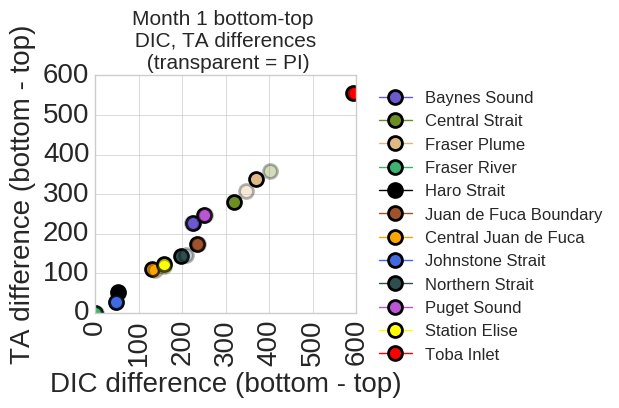

In [27]:
mon1 = 1
fig, ((ax)) \
= plt.subplots(1, 1, figsize=(4, 4), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    diffTA_PI = bottomTA_PI - topTA_PI

    ax.plot(diffDIC_BR,diffTA_BR,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color']) 
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 15)

ax.set_xlabel('DIC difference (bottom - top)', fontsize = 20)
ax.set_ylabel('TA difference (bottom - top)', fontsize = 20)
ax.legend(bbox_to_anchor=[2.0,1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)

## What parameterspace are we in (winter)?

#### taking only 'moderate stations:
#### Cent. St., N. St.,  Baynes Sound, Central JdF, Puget Sound
    
    #winter values
    BR DIC RANGE (BOTTOM): 1989 -2209
    BR DIC RANGE (TOP): 1764 -2078
    DIC-TA RANGE (BOTTOM): 27 - 71
    DIC-TA RANGE (TOP): 64- 90
    TOP-BOTTOM DIC GRADIENT RANGE 131- 318
    ‘EXTRA’ DIC BR-PI RANGE: 0 - 20 (CS doesn’t count, stochastic run)
    
    #summer values
    BR DIC RANGE (BOTTOM): 1954 -2296
    BR DIC RANGE (TOP): 1565 -2004
    DIC-TA RANGE (BOTTOM): 16 - 113
    DIC-TA RANGE (TOP): 157 - 247
    TOP-BOTTOM DIC GRADIENT RANGE 239- 408
    ‘EXTRA’ DIC BR-PI RANGE: 0 - 22 (CS doesn’t count)

(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.,
        2400.]), <a list of 10 Text xticklabel objects>)

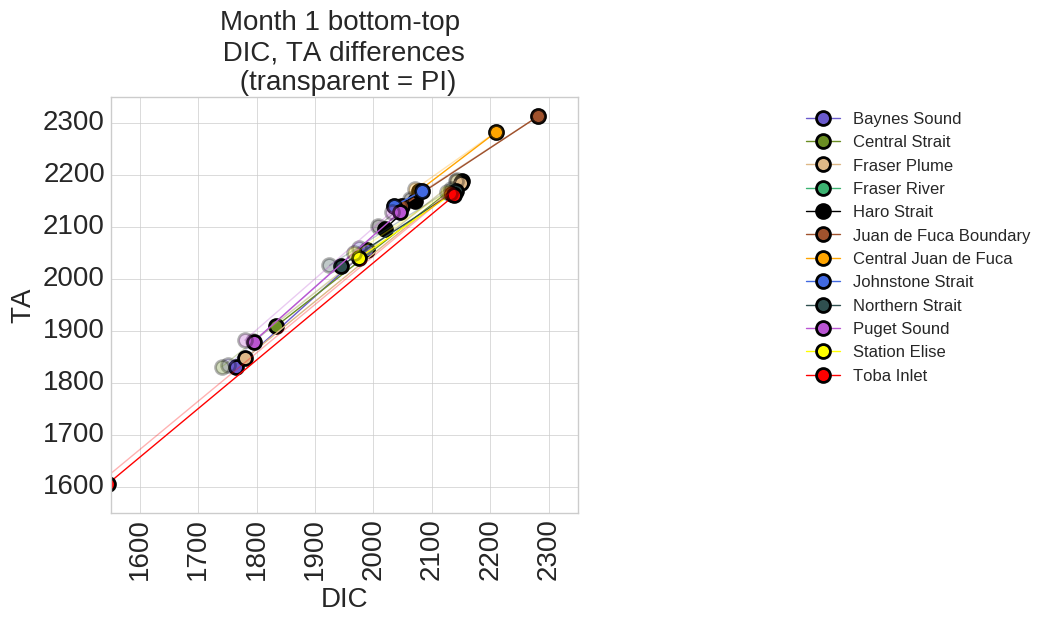

In [28]:
mon1 = 1
fig, ((ax)) \
= plt.subplots(1, 1, figsize=(6, 6), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    DIC = [bottomDIC_BR,topDIC_BR]
    TA = [bottomTA_BR,topTA_BR]
    ax.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC_PI = [bottomDIC_PI,topDIC_PI]
    TA_PI = [bottomTA_PI,topTA_PI]
    ax.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.legend(bbox_to_anchor=[2.0,1.0])

ax.set_xlabel('DIC', fontsize = 20)
ax.set_ylabel('TA', fontsize = 20)
#
ax.set_xlim([1550,2350])   
ax.set_ylim([1550,2350]) 
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)


Baynes Sound values:
BR DIC BOTTOM/TOP: 1989/1764, PI DIC BOTTOM/TOP: 1974/1751
BR TA BOTTOM/TOP: 2055/1829, PI TA BOTTOM/TOP: 2059/1832
BR TA-DIC BOTTOM/TOP: 66/64, PI DIC BOTTOM/TOP: 85/81
BR vertical gradient:224, PI vertical gradient: 223
Extra (BR-PI) DIC on top: 13, Extra (BR-PI) DIC on bottom: 14

Central Strait values:
BR DIC BOTTOM/TOP: 2151/1833, PI DIC BOTTOM/TOP: 2143/1740
BR TA BOTTOM/TOP: 2187/1908, PI TA BOTTOM/TOP: 2190/1830
BR TA-DIC BOTTOM/TOP: 36/75, PI DIC BOTTOM/TOP: 46/89
BR vertical gradient:318, PI vertical gradient: 402
Extra (BR-PI) DIC on top: 92, Extra (BR-PI) DIC on bottom: 8

Central Juan de Fuca values:
BR DIC BOTTOM/TOP: 2209/2078, PI DIC BOTTOM/TOP: 2209/2070
BR TA BOTTOM/TOP: 2281/2169, PI TA BOTTOM/TOP: 2281/2172
BR TA-DIC BOTTOM/TOP: 71/90, PI DIC BOTTOM/TOP: 72/101
BR vertical gradient:131, PI vertical gradient: 138
Extra (BR-PI) DIC on top: 7, Extra (BR-PI) DIC on bottom: 0

Northern Strait values:
BR DIC BOTTOM/TOP: 2141/1945, PI DIC BOTTOM/TOP: 

(array([1700., 1800., 1900., 2000., 2100., 2200., 2300.]),
 <a list of 7 Text xticklabel objects>)

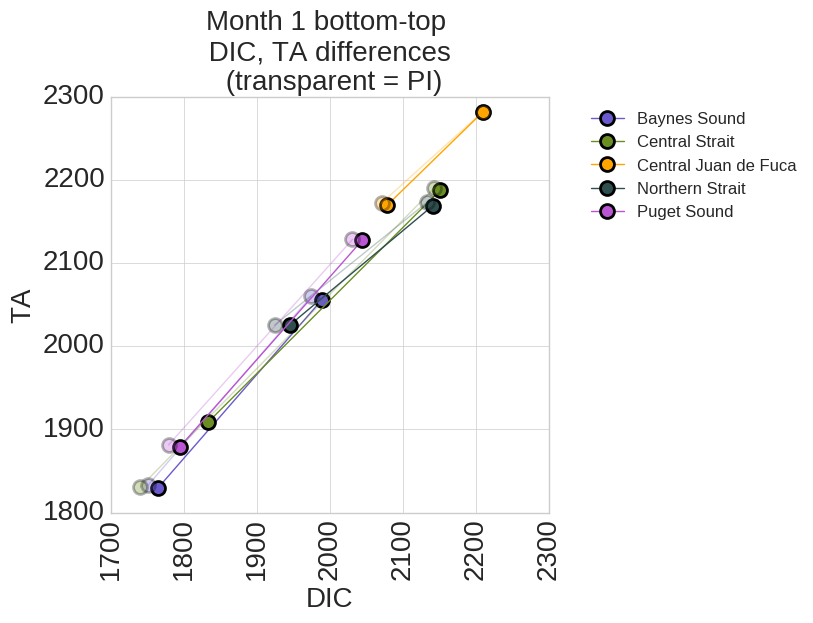

In [29]:
mon1 = 1
fig, ((ax)) \
= plt.subplots(1, 1, figsize=(6, 6), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    if ((tstn is 'CS') |(tstn is 'NS') | (tstn is 'JDFC') | (tstn is 'BS')| (tstn is 'PS')):
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        w = mon_DIC_BR_mean[mon1-1]
        nans = np.where(np.isnan(w))
        firstnan = (nans[0][0])
        bottomDIC_BR = w[firstnan-1]
        topDIC_BR = w[0]
        diffDIC_BR = bottomDIC_BR - topDIC_BR
        w = mon_TA_BR_mean[mon1-1]
        nans = np.where(np.isnan(w))
        firstnan = (nans[0][0])
        bottomTA_BR = w[firstnan-1]
        topTA_BR = w[0]
        diffTA_BR = bottomTA_BR - topTA_BR

        w2 = mon_DIC_PI_mean[mon1-1]
        nans2 = np.where(np.isnan(w2))
        firstnan2 = (nans2[0][0])
        bottomDIC_PI = w2[firstnan2-1]
        topDIC_PI = w2[0]
        diffDIC_PI = bottomDIC_PI - topDIC_PI
        w2 = mon_TA_PI_mean[mon1-1]
        nans2 = np.where(np.isnan(w2))
        firstnan2 = (nans2[0][0])
        bottomTA_PI = w2[firstnan2-1]
        topTA_PI = w2[0]
        DIC = [bottomDIC_BR,topDIC_BR]
        TA = [bottomTA_BR,topTA_BR]
        ax.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        DIC_PI = [bottomDIC_PI,topDIC_PI]
        TA_PI = [bottomTA_PI,topTA_PI]
        ax.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        print('')
        print(cs.STATIONS[tstn]['fullname']+ ' values:')
        print('BR DIC BOTTOM/TOP: '+str(int(bottomDIC_BR))+'/'+str(int(topDIC_BR))+ ', PI DIC BOTTOM/TOP: '+str(int(bottomDIC_PI))+'/'+str(int(topDIC_PI)))
        print('BR TA BOTTOM/TOP: '+str(int(bottomTA_BR))+'/'+str(int(topTA_BR))+ ', PI TA BOTTOM/TOP: '+str(int(bottomTA_PI))+'/'+str(int(topTA_PI)))

        print('BR TA-DIC BOTTOM/TOP: '+str(int(bottomTA_BR-bottomDIC_BR))+'/'+str(int(topTA_BR-topDIC_BR))+ ', PI DIC BOTTOM/TOP: '+str(int(bottomTA_PI-bottomDIC_PI))+'/'+str(int(topTA_PI-topDIC_PI)))

        print('BR vertical gradient:'+ str(int(bottomDIC_BR-topDIC_BR)) + ', PI vertical gradient: '+str(int(bottomDIC_PI-topDIC_PI)))
        print('Extra (BR-PI) DIC on top: ' + str(int(topDIC_BR-topDIC_PI))+', Extra (BR-PI) DIC on bottom: ' + str(int(bottomDIC_BR-bottomDIC_PI)))
ax.legend(bbox_to_anchor=[1.6,1.0])

ax.set_xlabel('DIC', fontsize = 20)
ax.set_ylabel('TA', fontsize = 20)
#
# ax.set_xlim([1550,2350])   
# ax.set_ylim([1550,2350]) 
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)

### summer

    #summer values
    BR DIC RANGE (BOTTOM): 1954 -2296
    BR DIC RANGE (TOP): 1565 -2004
    DIC-TA RANGE (BOTTOM): 16 - 113
    TOP-BOTTOM DIC GRADIENT RANGE 239- 408
    ‘EXTRA’ DIC BR-PI RANGE: 0 - 22 (CS doesn’t count)

(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.,
        2400.]), <a list of 10 Text xticklabel objects>)

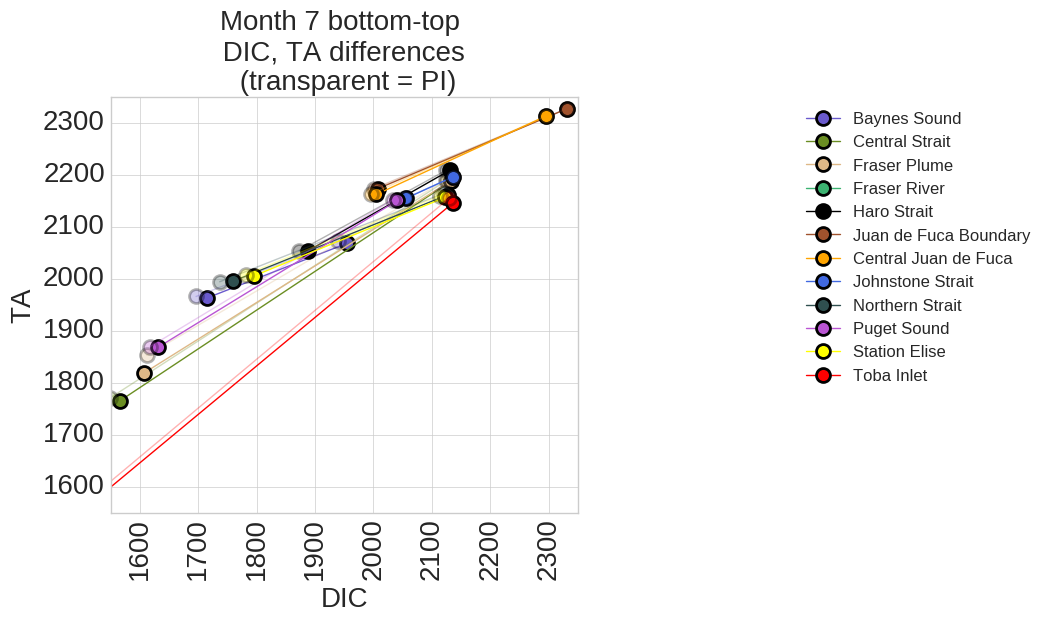

In [30]:
mon1 = 7
fig, ((ax)) \
= plt.subplots(1, 1, figsize=(6, 6), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    DIC = [bottomDIC_BR,topDIC_BR]
    TA = [bottomTA_BR,topTA_BR]
    ax.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC_PI = [bottomDIC_PI,topDIC_PI]
    TA_PI = [bottomTA_PI,topTA_PI]
    ax.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.legend(bbox_to_anchor=[2.0,1.0])

ax.set_xlabel('DIC', fontsize = 20)
ax.set_ylabel('TA', fontsize = 20)
#
ax.set_xlim([1550,2350])   
ax.set_ylim([1550,2350]) 
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)


Baynes Sound values:
BR DIC BOTTOM/TOP: 1954/1714, PI DIC BOTTOM/TOP: 1939/1696
BR TA BOTTOM/TOP: 2067/1962, PI TA BOTTOM/TOP: 2071/1965
BR TA-DIC BOTTOM/TOP: 113/247, PI DIC BOTTOM/TOP: 132/269
BR vertical gradient:239, PI vertical gradient: 242
Extra (BR-PI) DIC on top: 18, Extra (BR-PI) DIC on bottom: 15

Central Strait values:
BR DIC BOTTOM/TOP: 2132/1565, PI DIC BOTTOM/TOP: 2125/1548
BR TA BOTTOM/TOP: 2187/1764, PI TA BOTTOM/TOP: 2189/1769
BR TA-DIC BOTTOM/TOP: 54/198, PI DIC BOTTOM/TOP: 63/221
BR vertical gradient:566, PI vertical gradient: 577
Extra (BR-PI) DIC on top: 17, Extra (BR-PI) DIC on bottom: 7

Central Juan de Fuca values:
BR DIC BOTTOM/TOP: 2296/2004, PI DIC BOTTOM/TOP: 2296/1995
BR TA BOTTOM/TOP: 2313/2161, PI TA BOTTOM/TOP: 2313/2162
BR TA-DIC BOTTOM/TOP: 16/157, PI DIC BOTTOM/TOP: 17/167
BR vertical gradient:291, PI vertical gradient: 300
Extra (BR-PI) DIC on top: 9, Extra (BR-PI) DIC on bottom: 0

Northern Strait values:
BR DIC BOTTOM/TOP: 2126/1759, PI DIC BOTTO

(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.]),
 <a list of 9 Text xticklabel objects>)

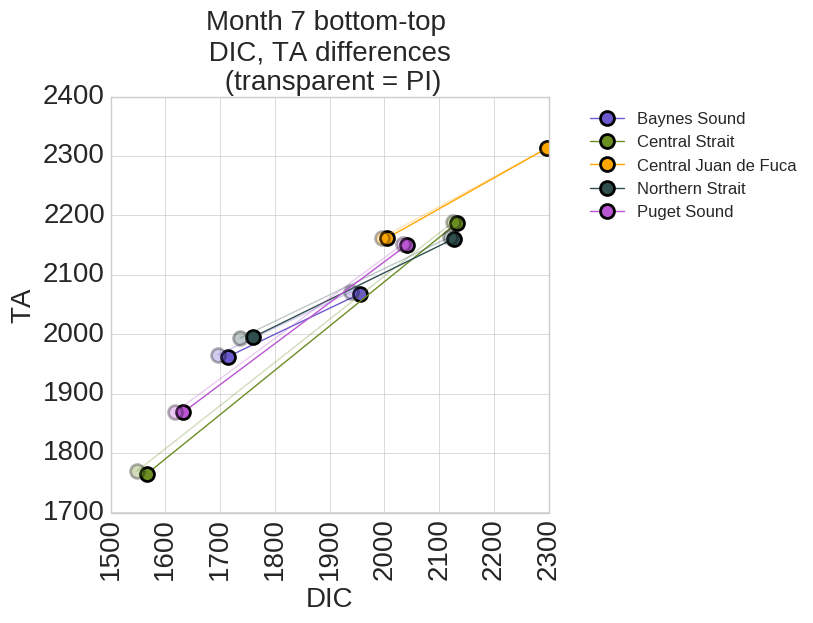

In [31]:
mon1 = 7
fig, ((ax)) \
= plt.subplots(1, 1, figsize=(6, 6), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    if ((tstn is 'CS') |(tstn is 'NS') | (tstn is 'JDFC') | (tstn is 'BS')| (tstn is 'PS')):
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        w = mon_DIC_BR_mean[mon1-1]
        nans = np.where(np.isnan(w))
        firstnan = (nans[0][0])
        bottomDIC_BR = w[firstnan-1]
        topDIC_BR = w[0]
        diffDIC_BR = bottomDIC_BR - topDIC_BR
        w = mon_TA_BR_mean[mon1-1]
        nans = np.where(np.isnan(w))
        firstnan = (nans[0][0])
        bottomTA_BR = w[firstnan-1]
        topTA_BR = w[0]
        diffTA_BR = bottomTA_BR - topTA_BR

        w2 = mon_DIC_PI_mean[mon1-1]
        nans2 = np.where(np.isnan(w2))
        firstnan2 = (nans2[0][0])
        bottomDIC_PI = w2[firstnan2-1]
        topDIC_PI = w2[0]
        diffDIC_PI = bottomDIC_PI - topDIC_PI
        w2 = mon_TA_PI_mean[mon1-1]
        nans2 = np.where(np.isnan(w2))
        firstnan2 = (nans2[0][0])
        bottomTA_PI = w2[firstnan2-1]
        topTA_PI = w2[0]
        DIC = [bottomDIC_BR,topDIC_BR]
        TA = [bottomTA_BR,topTA_BR]
        ax.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        DIC_PI = [bottomDIC_PI,topDIC_PI]
        TA_PI = [bottomTA_PI,topTA_PI]
        ax.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        print('')
        print(cs.STATIONS[tstn]['fullname']+ ' values:')
        print('BR DIC BOTTOM/TOP: '+str(int(bottomDIC_BR))+'/'+str(int(topDIC_BR))+ ', PI DIC BOTTOM/TOP: '+str(int(bottomDIC_PI))+'/'+str(int(topDIC_PI)))
        print('BR TA BOTTOM/TOP: '+str(int(bottomTA_BR))+'/'+str(int(topTA_BR))+ ', PI TA BOTTOM/TOP: '+str(int(bottomTA_PI))+'/'+str(int(topTA_PI)))

        print('BR TA-DIC BOTTOM/TOP: '+str(int(bottomTA_BR-bottomDIC_BR))+'/'+str(int(topTA_BR-topDIC_BR))+ ', PI DIC BOTTOM/TOP: '+str(int(bottomTA_PI-bottomDIC_PI))+'/'+str(int(topTA_PI-topDIC_PI)))

        print('BR vertical gradient:'+ str(int(bottomDIC_BR-topDIC_BR)) + ', PI vertical gradient: '+str(int(bottomDIC_PI-topDIC_PI)))
        print('Extra (BR-PI) DIC on top: ' + str(int(topDIC_BR-topDIC_PI))+', Extra (BR-PI) DIC on bottom: ' + str(int(bottomDIC_BR-bottomDIC_PI)))
ax.legend(bbox_to_anchor=[1.6,1.0])

ax.set_xlabel('DIC', fontsize = 20)
ax.set_ylabel('TA', fontsize = 20)
#
# ax.set_xlim([1550,2350])   
# ax.set_ylim([1550,2350]) 
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)

## Looking at in different regions of space wrt:

    - Increase in DIC
    - difference of DIC and TA
    - absolute values of DIC/TA

In [32]:
    #### TA - DIC = 100
    #### anthropogenic DIC increase = 10
    #### absolute bottom values 1950, 2050, 2150
    #### S 29, T 7 everywhere

    #### TA - DIC = 100
    #### anthropogenic DIC increase = 10
    #### absolute bottom values 1950, 2050, 2150
    #### S 29, T 7 everywhere

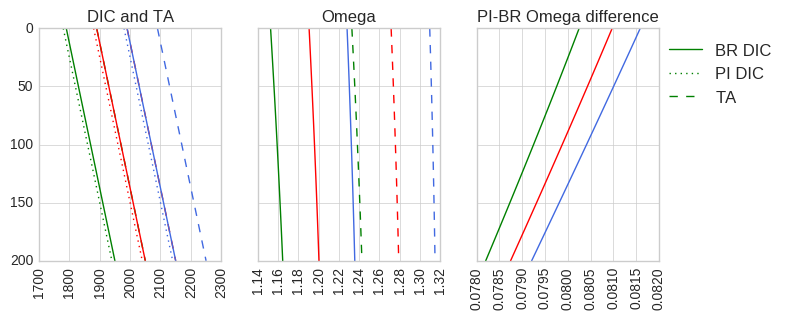

In [33]:
grad = 0.8
TAgrad = 0.8
anthrodic = 10 
bottom_TA = 100

dp = np.arange(0,210,10)
p1 = np.zeros_like(dp)
p2 = np.zeros_like(dp)
p3 = np.zeros_like(dp)
p4 = np.zeros_like(dp)

p1_TA = np.zeros_like(dp)
p2_TA = np.zeros_like(dp)
p3_TA = np.zeros_like(dp)
p4_TA = np.zeros_like(dp)

sal_prof = np.zeros_like(p3)
sal_prof[:] = 29
temp_prof = np.zeros_like(p3)
temp_prof[:] = 8

for i in range(0,len(p1)):
    p1[i] = 1950 - (grad*(200-dp[i]))    
    p1_TA[i] = 1950 + bottom_TA - (TAgrad*(200-dp[i]))
    p2[i] = 2050 - (grad*(200-dp[i]))
    p2_TA[i] = 2050 + bottom_TA - (TAgrad*(200-dp[i]))
    p3[i] = 2150 - (grad*(200-dp[i]))
    p3_TA[i] = 2150 + bottom_TA - (TAgrad*(200-dp[i]))
    p4[i] = 2250 - (grad*(200-dp[i]))
    p4_TA[i] = 2250 + bottom_TA - (TAgrad*(200-dp[i]))

fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(8,3), sharey=True)

ax.invert_yaxis()
ax.plot(p1,dp, linestyle = '-', color = 'green', label = 'BR DIC')     
ax.plot(p1-anthrodic,dp, linestyle = ':', color = 'green', label = 'PI DIC')    
ax.plot(p1_TA,dp, linestyle = '--', color = 'green', label = 'TA')  

ax.plot(p2,dp, linestyle = '-', color = 'red')     
ax.plot(p2-anthrodic,dp, linestyle = ':', color = 'red')    
ax.plot(p2_TA,dp, linestyle = '--', color = 'red')     

ax.plot(p3,dp, linestyle = '-', color = 'royalblue')     
ax.plot(p3-anthrodic,dp, linestyle = ':', color = 'royalblue')    
ax.plot(p3_TA,dp, linestyle = '--', color = 'royalblue')  
ax.legend(bbox_to_anchor=[4.1,1.0])    
ax.set_title('DIC and TA')
tzero = sal_prof * 0 
tzero = sal_prof * 0 

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=p1*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1,pco2,fco2,co2,hco3,co3,OmegaA_p1,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=(p1-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1_PI,pco2,fco2,co2,hco3,co3,OmegaA_p1_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=p2*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2,pco2,fco2,co2,hco3,co3,OmegaA_p2,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=(p2-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2_PI,pco2,fco2,co2,hco3,co3,OmegaA_p2_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=p3*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3,pco2,fco2,co2,hco3,co3,OmegaA_p3,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=(p3-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3_PI,pco2,fco2,co2,hco3,co3,OmegaA_p3_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

ax2.plot(OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
ax2.plot(OmegaA_p1_PI,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
ax2.plot(OmegaA_p2_PI,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
ax2.plot(OmegaA_p3_PI,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax2.set_title('Omega')

ax3.plot(OmegaA_p1_PI-OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p2_PI-OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p3_PI-OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax3.set_title('PI-BR Omega difference')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


    #### TA - DIC = 50
    #### anthropogenic DIC increase = 10
    #### absolute bottom values 1950, 2050, 2150
    #### S 29, T 7 everywhere

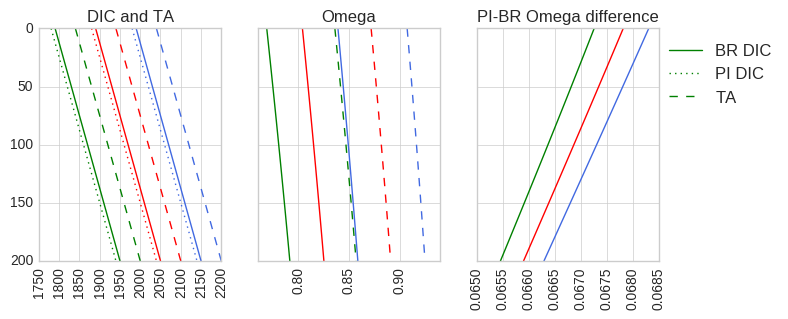

In [34]:
grad = 0.8
TAgrad = 0.8
anthrodic = 10 
bottom_TA = 50

dp = np.arange(0,210,10)
p1 = np.zeros_like(dp)
p2 = np.zeros_like(dp)
p3 = np.zeros_like(dp)
p4 = np.zeros_like(dp)

p1_TA = np.zeros_like(dp)
p2_TA = np.zeros_like(dp)
p3_TA = np.zeros_like(dp)
p4_TA = np.zeros_like(dp)

sal_prof = np.zeros_like(p3)
sal_prof[:] = 29
temp_prof = np.zeros_like(p3)
temp_prof[:] = 8

for i in range(0,len(p1)):
    p1[i] = 1950 - (grad*(200-dp[i]))    
    p1_TA[i] = 1950 + bottom_TA - (TAgrad*(200-dp[i]))
    p2[i] = 2050 - (grad*(200-dp[i]))
    p2_TA[i] = 2050 + bottom_TA - (TAgrad*(200-dp[i]))
    p3[i] = 2150 - (grad*(200-dp[i]))
    p3_TA[i] = 2150 + bottom_TA - (TAgrad*(200-dp[i]))
    p4[i] = 2250 - (grad*(200-dp[i]))
    p4_TA[i] = 2250 + bottom_TA - (TAgrad*(200-dp[i]))

fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(8,3), sharey=True)

ax.invert_yaxis()
ax.plot(p1,dp, linestyle = '-', color = 'green', label = 'BR DIC')     
ax.plot(p1-anthrodic,dp, linestyle = ':', color = 'green', label = 'PI DIC')    
ax.plot(p1_TA,dp, linestyle = '--', color = 'green', label = 'TA')  

ax.plot(p2,dp, linestyle = '-', color = 'red')     
ax.plot(p2-anthrodic,dp, linestyle = ':', color = 'red')    
ax.plot(p2_TA,dp, linestyle = '--', color = 'red')     

ax.plot(p3,dp, linestyle = '-', color = 'royalblue')     
ax.plot(p3-anthrodic,dp, linestyle = ':', color = 'royalblue')    
ax.plot(p3_TA,dp, linestyle = '--', color = 'royalblue')  
ax.legend(bbox_to_anchor=[4.1,1.0])    
ax.set_title('DIC and TA')
tzero = sal_prof * 0 
tzero = sal_prof * 0 

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=p1*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1,pco2,fco2,co2,hco3,co3,OmegaA_p1,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=(p1-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1_PI,pco2,fco2,co2,hco3,co3,OmegaA_p1_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=p2*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2,pco2,fco2,co2,hco3,co3,OmegaA_p2,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=(p2-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2_PI,pco2,fco2,co2,hco3,co3,OmegaA_p2_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=p3*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3,pco2,fco2,co2,hco3,co3,OmegaA_p3,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=(p3-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3_PI,pco2,fco2,co2,hco3,co3,OmegaA_p3_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

ax2.plot(OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
ax2.plot(OmegaA_p1_PI,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
ax2.plot(OmegaA_p2_PI,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
ax2.plot(OmegaA_p3_PI,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax2.set_title('Omega')

ax3.plot(OmegaA_p1_PI-OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p2_PI-OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p3_PI-OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax3.set_title('PI-BR Omega difference')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


In [35]:
    #### TA - DIC = 25
    #### anthropogenic DIC increase = 10
    #### absolute bottom values 1950, 2050, 2150
    #### S 29, T 7 everywhere

    #### TA - DIC = 25
    #### anthropogenic DIC increase = 10
    #### absolute bottom values 1950, 2050, 2150
    #### S 29, T 7 everywhere

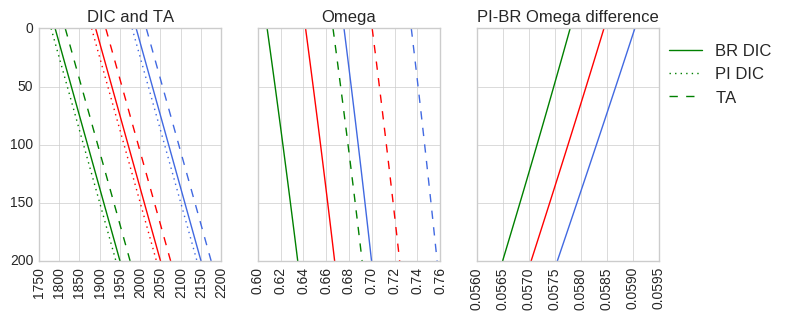

In [36]:
grad = 0.8
TAgrad = 0.8
anthrodic = 10 
bottom_TA = 25

dp = np.arange(0,210,10)
p1 = np.zeros_like(dp)
p2 = np.zeros_like(dp)
p3 = np.zeros_like(dp)
p4 = np.zeros_like(dp)

p1_TA = np.zeros_like(dp)
p2_TA = np.zeros_like(dp)
p3_TA = np.zeros_like(dp)
p4_TA = np.zeros_like(dp)

sal_prof = np.zeros_like(p3)
sal_prof[:] = 29
temp_prof = np.zeros_like(p3)
temp_prof[:] = 8

for i in range(0,len(p1)):
    p1[i] = 1950 - (grad*(200-dp[i]))    
    p1_TA[i] = 1950 + bottom_TA - (TAgrad*(200-dp[i]))
    p2[i] = 2050 - (grad*(200-dp[i]))
    p2_TA[i] = 2050 + bottom_TA - (TAgrad*(200-dp[i]))
    p3[i] = 2150 - (grad*(200-dp[i]))
    p3_TA[i] = 2150 + bottom_TA - (TAgrad*(200-dp[i]))
    p4[i] = 2250 - (grad*(200-dp[i]))
    p4_TA[i] = 2250 + bottom_TA - (TAgrad*(200-dp[i]))

fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(8,3), sharey=True)

ax.invert_yaxis()
ax.plot(p1,dp, linestyle = '-', color = 'green', label = 'BR DIC')     
ax.plot(p1-anthrodic,dp, linestyle = ':', color = 'green', label = 'PI DIC')    
ax.plot(p1_TA,dp, linestyle = '--', color = 'green', label = 'TA')  

ax.plot(p2,dp, linestyle = '-', color = 'red')     
ax.plot(p2-anthrodic,dp, linestyle = ':', color = 'red')    
ax.plot(p2_TA,dp, linestyle = '--', color = 'red')     

ax.plot(p3,dp, linestyle = '-', color = 'royalblue')     
ax.plot(p3-anthrodic,dp, linestyle = ':', color = 'royalblue')    
ax.plot(p3_TA,dp, linestyle = '--', color = 'royalblue')  
ax.legend(bbox_to_anchor=[4.1,1.0])    
ax.set_title('DIC and TA')
tzero = sal_prof * 0 
tzero = sal_prof * 0 

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=p1*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1,pco2,fco2,co2,hco3,co3,OmegaA_p1,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p1_TA*1e-3, dic=(p1-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p1_PI,pco2,fco2,co2,hco3,co3,OmegaA_p1_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=p2*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2,pco2,fco2,co2,hco3,co3,OmegaA_p2,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p2_TA*1e-3, dic=(p2-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p2_PI,pco2,fco2,co2,hco3,co3,OmegaA_p2_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=p3*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3,pco2,fco2,co2,hco3,co3,OmegaA_p3,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=temp_prof, sal=sal_prof, alk=p3_TA*1e-3, dic=(p3-anthrodic)*1e-3, 
                   sil=tzero, phos=tzero, patm=tzero, depth=dp, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_p3_PI,pco2,fco2,co2,hco3,co3,OmegaA_p3_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

ax2.plot(OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
ax2.plot(OmegaA_p1_PI,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
ax2.plot(OmegaA_p2_PI,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax2.plot(OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
ax2.plot(OmegaA_p3_PI,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax2.set_title('Omega')

ax3.plot(OmegaA_p1_PI-OmegaA_p1,dp, linestyle = '-', color = 'green', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'green', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p2_PI-OmegaA_p2,dp, linestyle = '-', color = 'red', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'red', label = 'PI $\Omega$')  
ax3.plot(OmegaA_p3_PI-OmegaA_p3,dp, linestyle = '-', color = 'royalblue', label = '$\Omega$')  
#ax2.plot(,dp, linestyle = '--', color = 'royalblue', label = 'PI $\Omega$')  
ax3.set_title('PI-BR Omega difference')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
